In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn_pandas import gen_features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv("nuclear_power_plants.csv")

In [4]:
df.shape

(803, 16)

In [5]:
df.head()

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId
0,1,Ågesta,59.206000,18.08290,Sweden,SE,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA,528.0
1,2,Akademik Lomonosov-1,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,895.0
2,3,Akademik Lomonosov-2,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,896.0
3,4,Akhvaz-1,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN
4,5,Akhvaz-2,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN


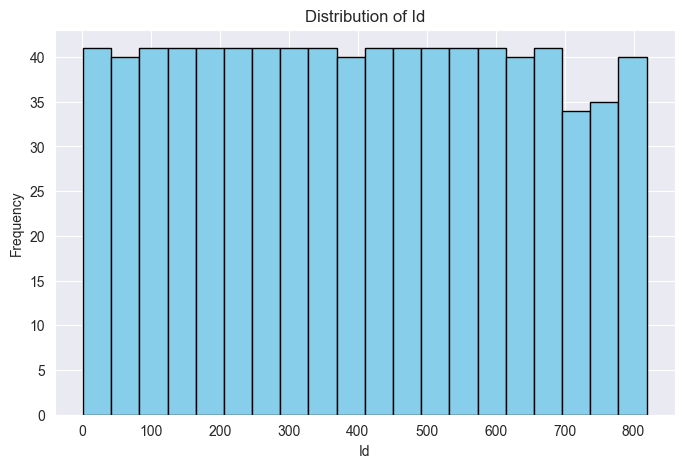

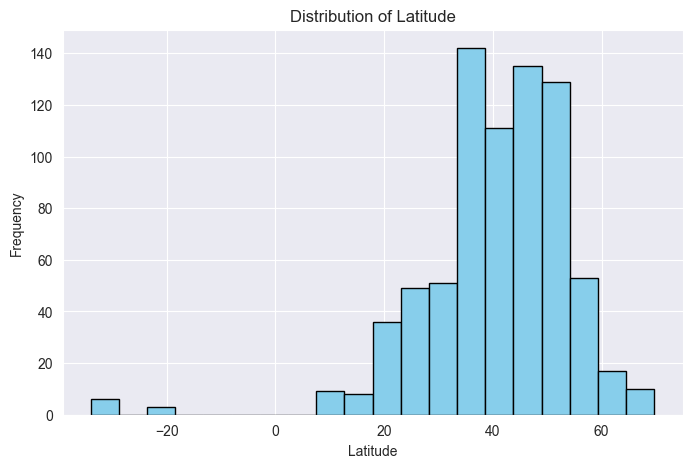

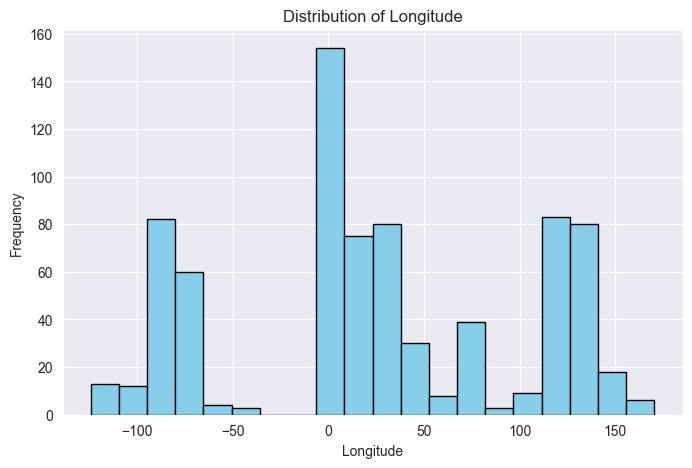

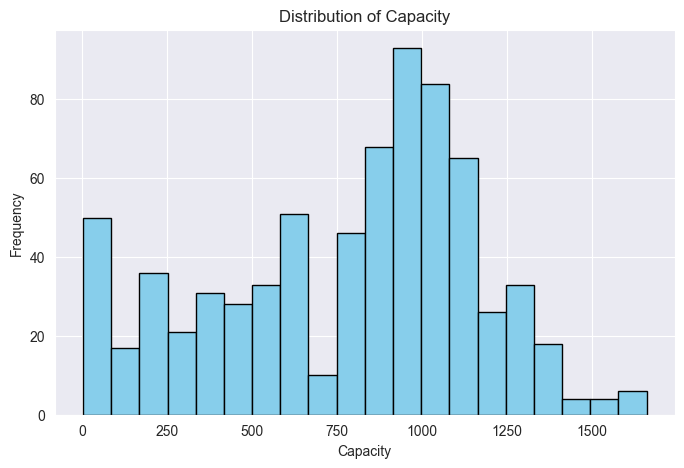

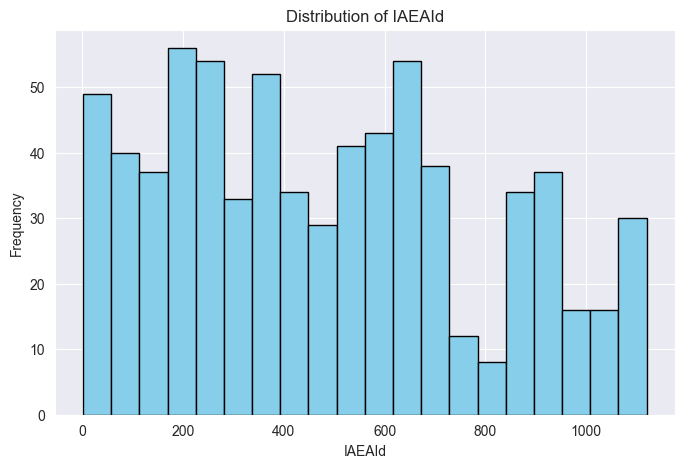

In [6]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

In [7]:
df.isna().sum()

Id                       0
Name                     0
Latitude                44
Longitude               44
Country                  0
CountryCode              0
Status                   0
ReactorType              9
ReactorModel            90
ConstructionStartAt     81
OperationalFrom        167
OperationalTo          591
Capacity                79
LastUpdatedAt           70
Source                   0
IAEAId                  90
dtype: int64

In [8]:
df.drop(['Id', 'Name', 'Country', 'Source','LastUpdatedAt'],axis=1, inplace=True)


In [9]:
df.isna().sum()

Latitude                44
Longitude               44
CountryCode              0
Status                   0
ReactorType              9
ReactorModel            90
ConstructionStartAt     81
OperationalFrom        167
OperationalTo          591
Capacity                79
IAEAId                  90
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             759 non-null    float64
 1   Longitude            759 non-null    float64
 2   CountryCode          803 non-null    object 
 3   Status               803 non-null    object 
 4   ReactorType          794 non-null    object 
 5   ReactorModel         713 non-null    object 
 6   ConstructionStartAt  722 non-null    object 
 7   OperationalFrom      636 non-null    object 
 8   OperationalTo        212 non-null    object 
 9   Capacity             724 non-null    float64
 10  IAEAId               713 non-null    float64
dtypes: float64(4), object(7)
memory usage: 69.1+ KB


numeric_col = ['Latitude','Longitude','Capacity','IAEAId']
categorical_features = ['CountryCode','Status','ReactorType', 'ReactorModel', 'ConstructionStartAt','OperationalFrom','OperationalTo','LastUpdatedAt ']

In [11]:
df.describe()

,Latitude,Longitude,Capacity,IAEAId
count,759.000000,759.000000,724.000000,713.000000
mean,40.489110,25.292645,778.419890,483.938289
std,13.511438,76.496960,383.894865,310.018021
min,-33.967000,-124.210000,3.000000,1.000000
25%,34.697000,-3.491000,497.000000,221.000000
50%,41.960000,17.687000,900.000000,453.000000
75%,49.537000,108.899917,1065.000000,689.000000
max,69.709579,170.306250,1660.000000,1120.000000


In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "Latitude": [ 59.206     69.709579        nan  36.144444  43.607     39.807
 -23.008    -23.01      55.084     35.31      40.182     40.1808
  41.202    -33.967     52.092     54.939     23.952748  55.745
  40.624     54.766667  43.62453   47.511     56.842     51.692
  47.552     49.709     45.359     68.059     45.256     48.494
  18.365     51.431     51.217     51.742     41.247     53.85
  34.704     44.341     53.891     33.958     45.796     45.798
  45.8       28.831     28.8287    28.8305    42.074     54.42
  38.763     38.435     45.072    -33.966667  34.263     35.053
  49.416     39.739     44.322     19.46075   55.014     32.392
  32.391944  51.389     25.292     47.232     50.086     46.457
  40.172     39.216     46.471     32.301     40.361     44.634
  28.966     47.732     30.707778  43.867     43.8644    43.8633
  41.597     22.599     35.212     51.323     41.975     44.326
  58.577     41.353     42.101     49.089     50.914     31.0

In [13]:
df.apply(lambda x: x.nunique())

Latitude               339
Longitude              337
CountryCode             41
Status                  10
ReactorType             13
ReactorModel           163
ConstructionStartAt    538
OperationalFrom        586
OperationalTo          170
Capacity               310
IAEAId                 713
dtype: int64

In [14]:
X = df

In [15]:
numeric_features = ['Latitude','Longitude','Capacity','IAEAId']
categorical_features = ['CountryCode','Status','ReactorType', 'ReactorModel', 'ConstructionStartAt','OperationalFrom','OperationalTo']
ctg= ['CountryCode','Status','ReactorType', 'ReactorModel', 'ConstructionStartAt','OperationalFrom','OperationalTo']

numeric_transformations = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': SimpleImputer, 'strategy': 'mean'},
        #{'class': StandardScaler}
        #{'class': MinMaxScaler}
    ]
)

categorical_transformations = gen_features(
    columns=[[col] for col in categorical_features],
        classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
        {'class': OneHotEncoder}
    ]
)
bin_trans = gen_features(
    columns=[[col] for col in ctg],
        classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
    ]
)


preprocessor = DataFrameMapper(
    numeric_transformations + categorical_transformations,
    df_out=True, default=False
)

X_prepr = preprocessor.fit_transform(X)

In [16]:
X_prepr

,Latitude,Longitude,Capacity,IAEAId,CountryCode_0,CountryCode_1,CountryCode_2,CountryCode_3,CountryCode_4,CountryCode_5,...,OperationalTo_160,OperationalTo_161,OperationalTo_162,OperationalTo_163,OperationalTo_164,OperationalTo_165,OperationalTo_166,OperationalTo_167,OperationalTo_168,OperationalTo_169
0,59.206000,18.082900,9.00000,528.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.709579,170.306250,30.00000,895.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.709579,170.306250,30.00000,896.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.489110,25.292645,778.41989,483.938289,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.489110,25.292645,778.41989,483.938289,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,56.637414,84.904510,300.00000,1106.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,27.201487,120.517974,1117.00000,1107.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,31.044167,28.497778,1100.00000,138.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,31.044167,28.497778,1100.00000,1120.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_prepr)

Explained Variance Ratio for each component: [6.65750037e-01 3.09316231e-01 2.42148728e-02 6.96362176e-04
 2.14825224e-06 1.86165875e-06 1.16569323e-06 6.88221018e-07
 5.96222981e-07 4.96858949e-07]
Cumulative Explained Variance Ratio: [0.66575004 0.97506627 0.99928114 0.9999775  0.99997965 0.99998151
 0.99998268 0.99998337 0.99998396 0.99998446]


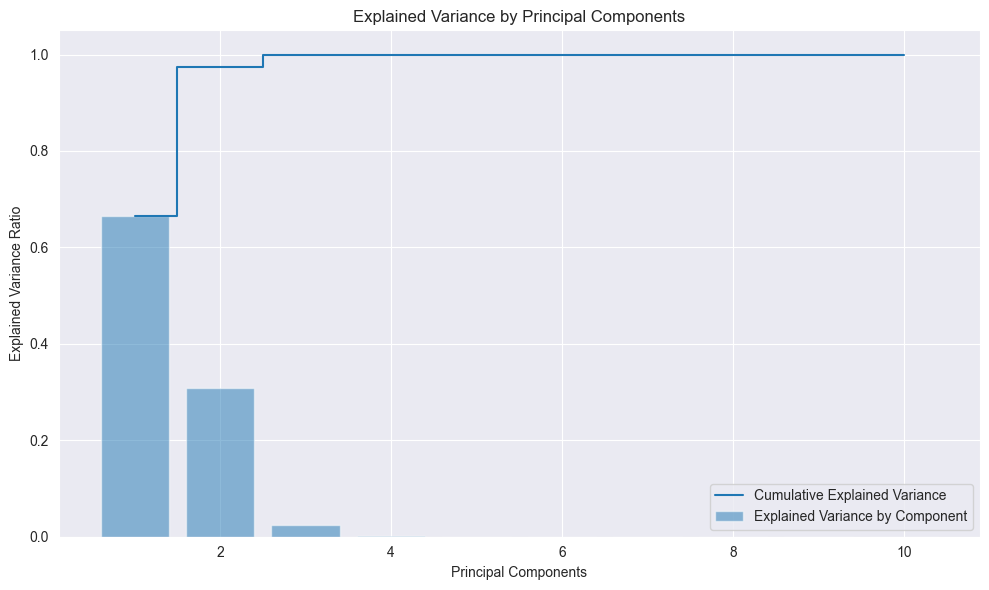

In [18]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(f'Explained Variance Ratio for each component: {explained_variance}')
print(f'Cumulative Explained Variance Ratio: {cumulative_variance}')
# Візуалізація explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Explained Variance by Component')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

G:\Ilya\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "G:\Ilya\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


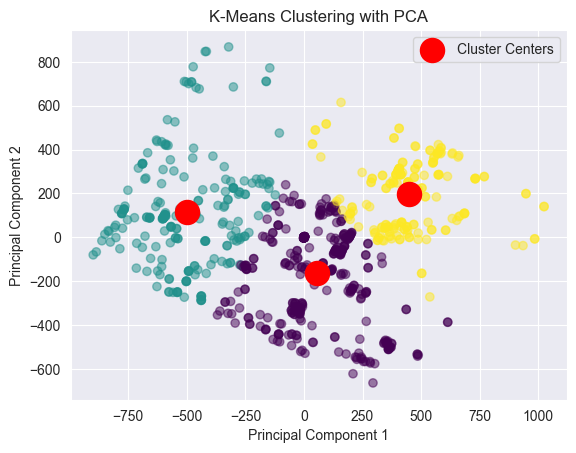

In [19]:
# Навчання моделі K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Візуалізація результату кластеризації
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()

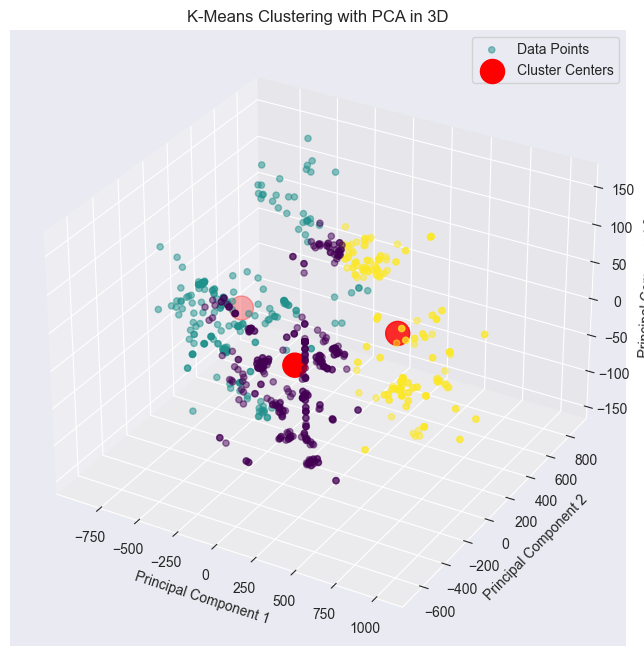

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки кластерів
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Центри кластерів
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='o', label='Cluster Centers')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering with PCA in 3D')
ax.legend()

plt.show()


In [21]:
silhouette_score_val = silhouette_score(X_pca, labels)
calinski_harabasz_score_val = calinski_harabasz_score(X_pca, labels)

print(f'Silhouette Score: {silhouette_score_val}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_score_val}')

Silhouette Score: 0.3999830271877657
Calinski-Harabasz Index: 717.8728143223733


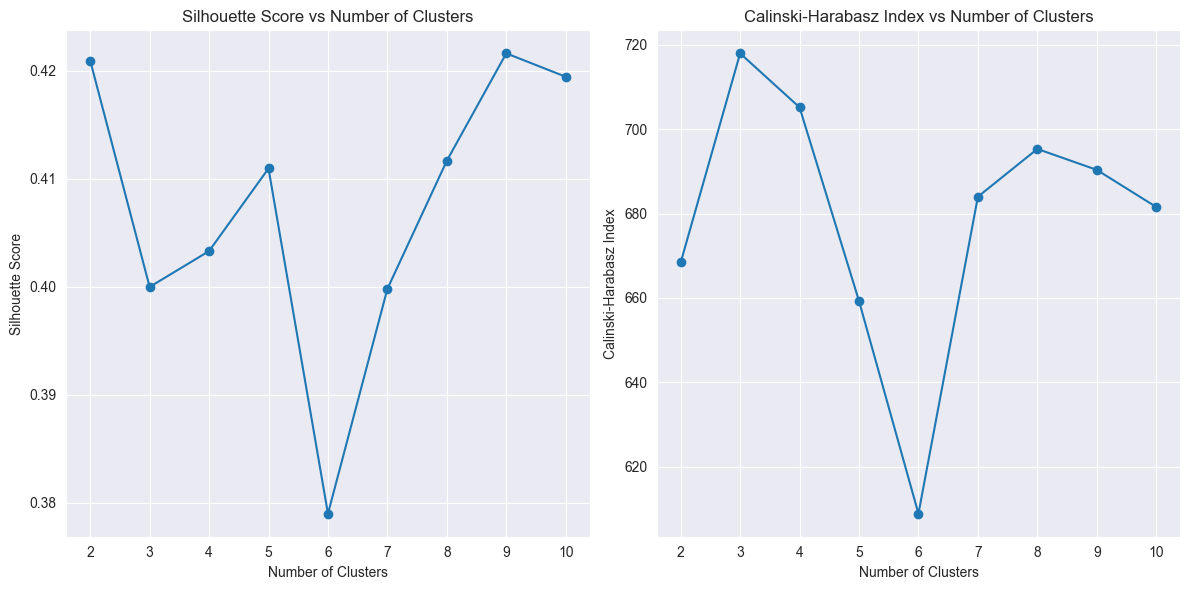

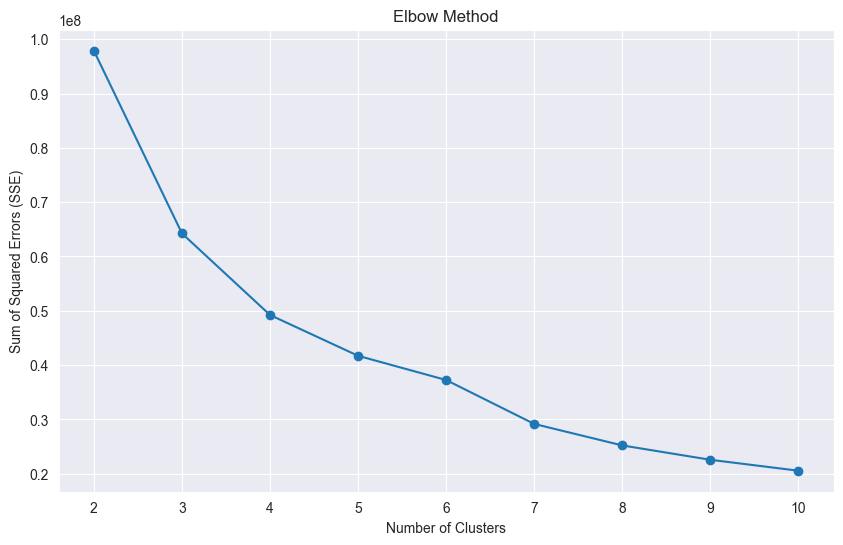

In [22]:

num_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []
calinski_harabasz_scores = []
sse_list = []


for num_clusters in num_clusters_list:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_model.fit(X_pca)
    labels = kmeans_model.labels_
    
    silhouette_score_val = silhouette_score(X_pca, labels)
    calinski_harabasz_score_val = calinski_harabasz_score(X_pca, labels)
    
    silhouette_scores.append(silhouette_score_val)
    calinski_harabasz_scores.append(calinski_harabasz_score_val)
    
    sse_list.append(kmeans_model.inertia_)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(num_clusters_list, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Number of Clusters')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(num_clusters_list, sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.xticks(num_clusters_list)
plt.grid(True)
plt.show()

G:\Ilya\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


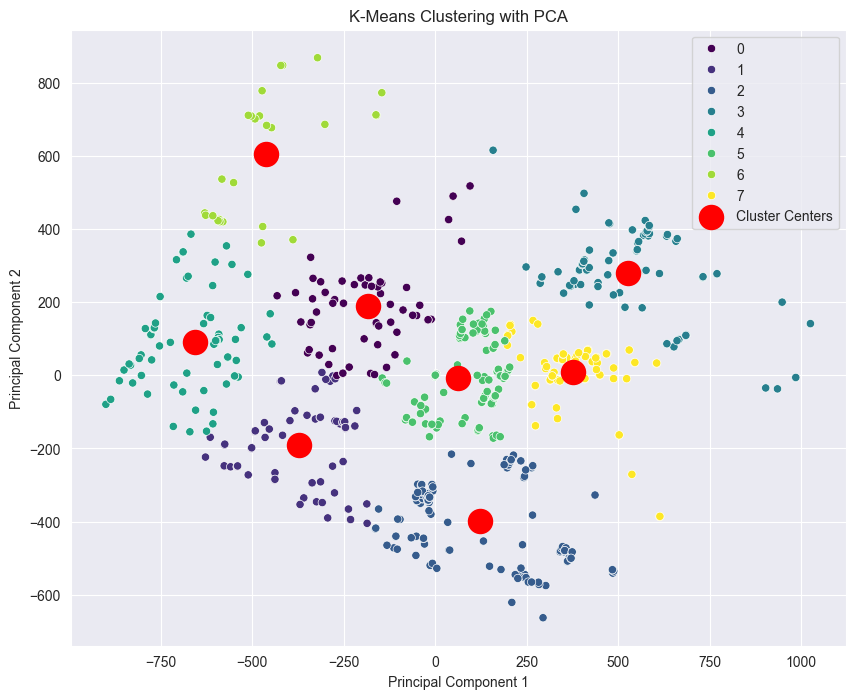

Silhouette Score: 0.40281174444197215


In [23]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_prepr)
labels = kmeans.labels_

pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_prepr)
centroid_pca = pca1.transform(kmeans.cluster_centers_)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca1[:, 0], y=X_pca1[:, 1], hue=labels, palette='viridis', legend='full')
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='o', s=300, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()


silhouette_avg = silhouette_score(X_prepr, labels)
print("Silhouette Score:", silhouette_avg)



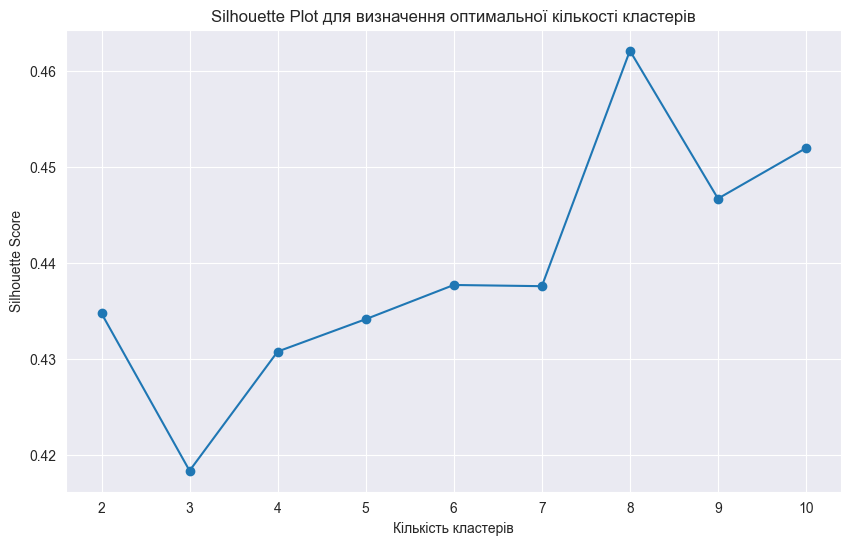

In [24]:
# Список для зберігання значень Silhouette
silhouette_scores = []
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prepr)
# Визначення оптимальної кількості кластерів
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка Silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot для визначення оптимальної кількості кластерів')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

For n_clusters = 10 The average silhouette_score is : 0.42591461616572696


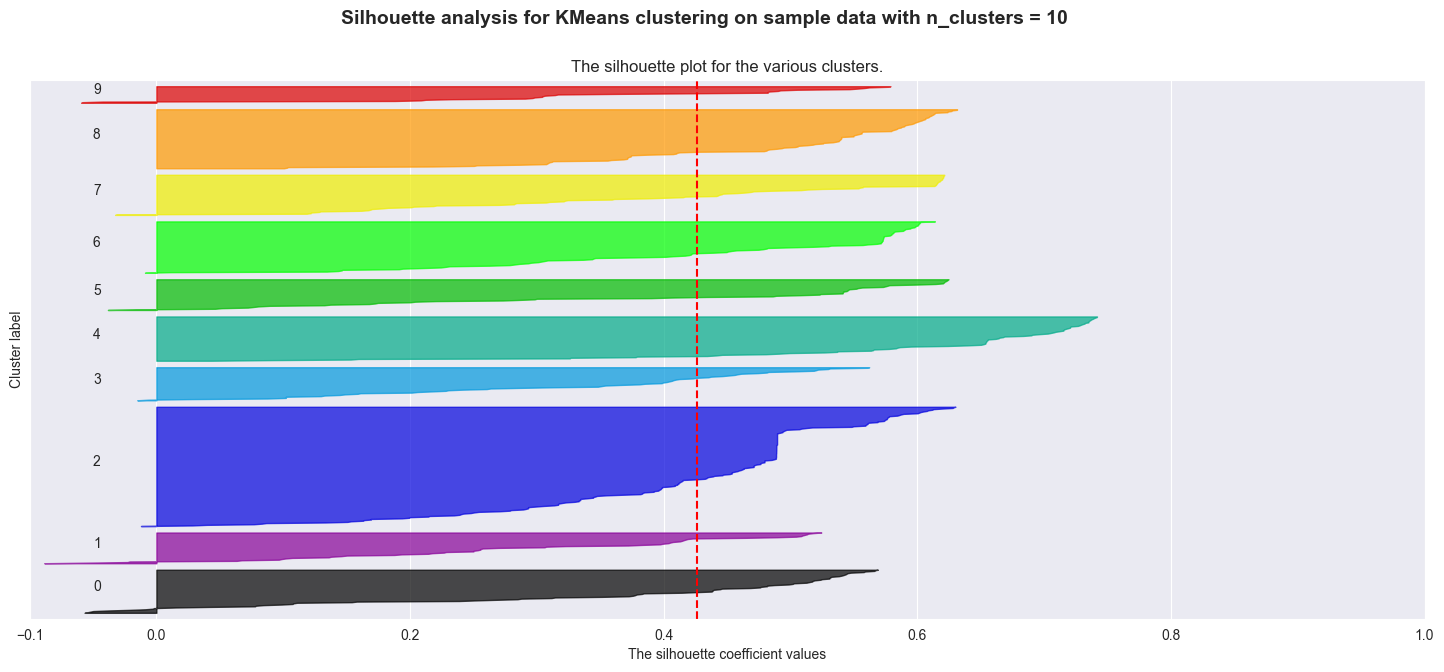

In [25]:
from sklearn.metrics import silhouette_samples
range_n_clusters = [10]  # Задайте діапазон кількості кластерів, які ви хочете перевірити


for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_prepr) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_prepr)

    silhouette_avg = silhouette_score(X_prepr, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_prepr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters, fontsize=14, fontweight="bold")

    plt.show()

In [26]:
numeric_col = ['Latitude','Longitude','Capacity','IAEAId']
simple_imputer = SimpleImputer(strategy='median')
df_imputed_numeric = simple_imputer.fit_transform(df[numeric_col])

In [27]:
df_imputed_numeric

array([[  59.206   ,   18.0829  ,    9.      ,  528.      ],
       [  69.709579,  170.30625 ,   30.      ,  895.      ],
       [  69.709579,  170.30625 ,   30.      ,  896.      ],
       ...,
       [  31.044167,   28.497778, 1100.      ,  138.      ],
       [  31.044167,   28.497778, 1100.      , 1120.      ],
       [  41.96    ,   17.687   , 1116.      , 1113.      ]])

Мітки кластерів: [2 1 1 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2
 0 0 0 0 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 0 0 0 0 2 2 2 2 0 2 2 2 2 2 0 0 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 0
 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 1 1 1 1 0 0 2 2 0 2 2 2 2 2 2
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 1 1 1 1 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2
 1 1 1 0 0 0 2 2 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 2 1
 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2
 2 2 2 1 1 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 2 2 2 2 2
 2 1 1 1 1 0 0 0 1 1 1 0 0 0 2 2 2 2 1 0 2 2 1 1 2 2 2 0 0 1 1 1 1 1 1 2 2
 2 2 0 0

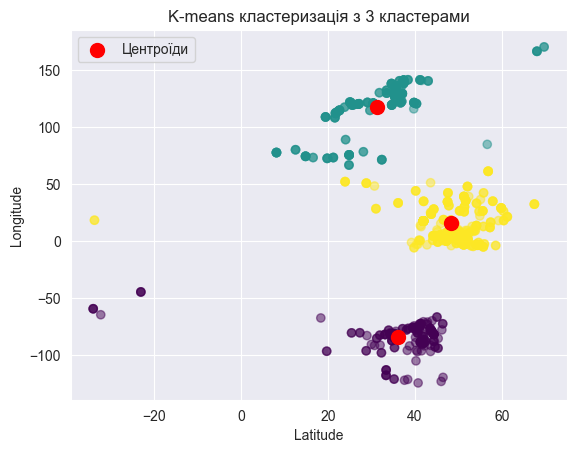

In [28]:
X = df_imputed_numeric[:, :2]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
sse = kmeans.inertia_ 
centers = kmeans.cluster_centers_
print("Мітки кластерів:", labels)
print("SSE:", sse)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=100, label='Центроїди')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-means кластеризація з 3 кластерами')
plt.legend()
plt.show()

In [29]:
silhouette_score_val = silhouette_score(X_pca, labels)
calinski_harabasz_score_val = calinski_harabasz_score(X_pca, labels)

print(f'Silhouette Score: {silhouette_score_val}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_score_val}')

Silhouette Score: 0.01670753341353082
Calinski-Harabasz Index: 30.535236787493965


# DBSCAN 

In [30]:

# Діапазон значень для eps та min_samples
eps_range = [0.1, 0.5, 1.0, 1.5, 2.0] 
min_samples_range = [3, 5, 10, 15, 20]  

best_eps = None
best_min_samples = None
best_silhouette = -1  
best_calinski_harabasz = -1  

for eps_val in eps_range:
    for min_samples_val in min_samples_range:
        
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan.fit(X_prepr)

        
        labels = dbscan.labels_
        if len(set(labels)) > 1: 
            silhouette = silhouette_score(X_prepr, labels)
            calinski_harabasz = calinski_harabasz_score(X_prepr, labels)

            
            if silhouette > best_silhouette and calinski_harabasz > best_calinski_harabasz:
                best_silhouette = silhouette
                best_calinski_harabasz = calinski_harabasz
                best_eps = eps_val
                best_min_samples = min_samples_val


print("Оптимальне значення eps:", best_eps)
print("Оптимальне значення min_samples:", best_min_samples)
print("Найкраще значення Silhouette Coefficient:", best_silhouette)
print("Найкраще значення Calinski-Harabasz Index:", best_calinski_harabasz)



Оптимальне значення eps: 1.5
Оптимальне значення min_samples: 3
Найкраще значення Silhouette Coefficient: -0.27658029523351146
Найкраще значення Calinski-Harabasz Index: 0.04582782329061299


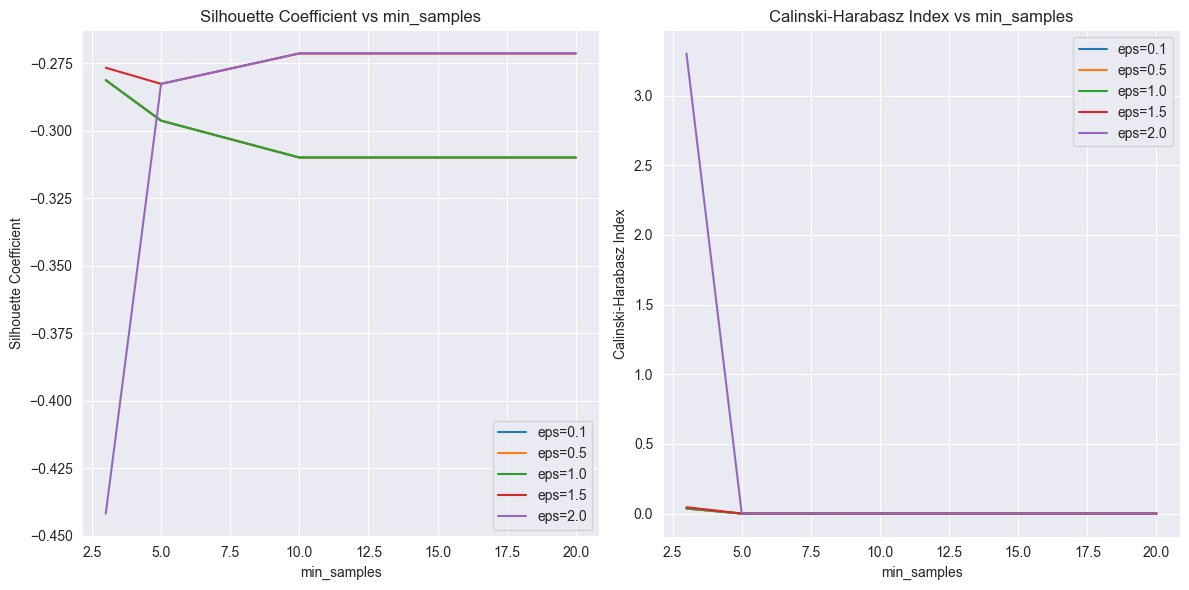

In [31]:

# Діапазон значень для eps та min_samples
eps_range = [0.1, 0.5, 1.0, 1.5, 2.0]  # Приклад значень для eps
min_samples_range = [3, 5, 10, 15, 20]  # Приклад значень для min_samples

silhouette_scores = []  # Зберігатиме значення Silhouette Coefficient
calinski_harabasz_scores = []  # Зберігатиме значення Calinski-Harabasz Index

for eps_val in eps_range:
    silhouette_row = []  # Зберігатиме рядок значень Silhouette Coefficient
    calinski_harabasz_row = []  # Зберігатиме рядок значень Calinski-Harabasz Index
    for min_samples_val in min_samples_range:
        # Навчання моделі DBSCAN з поточними параметрами
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan.fit(X_prepr)  # X - ваші дані

        # Оцінка результатів кластеризації за допомогою метрик
        labels = dbscan.labels_
        if len(set(labels)) > 1:  # Щоб метрики не вибивали помилку при недостатній кількості кластерів
            silhouette = silhouette_score(X_prepr, labels)
            calinski_harabasz = calinski_harabasz_score(X_prepr, labels)

            silhouette_row.append(silhouette)
            calinski_harabasz_row.append(calinski_harabasz)

    silhouette_scores.append(silhouette_row)
    calinski_harabasz_scores.append(calinski_harabasz_row)

# Побудова графіку
plt.figure(figsize=(12, 6))

# Графік Silhouette Coefficient
plt.subplot(1, 2, 1)
for i, eps_val in enumerate(eps_range):
    plt.plot(min_samples_range, silhouette_scores[i], label=f'eps={eps_val}')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.title('Silhouette Coefficient vs min_samples')

# Графік Calinski-Harabasz Index
plt.subplot(1, 2, 2)
for i, eps_val in enumerate(eps_range):
    plt.plot(min_samples_range, calinski_harabasz_scores[i], label=f'eps={eps_val}')
plt.xlabel('min_samples')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()
plt.title('Calinski-Harabasz Index vs min_samples')

plt.tight_layout()
plt.show()

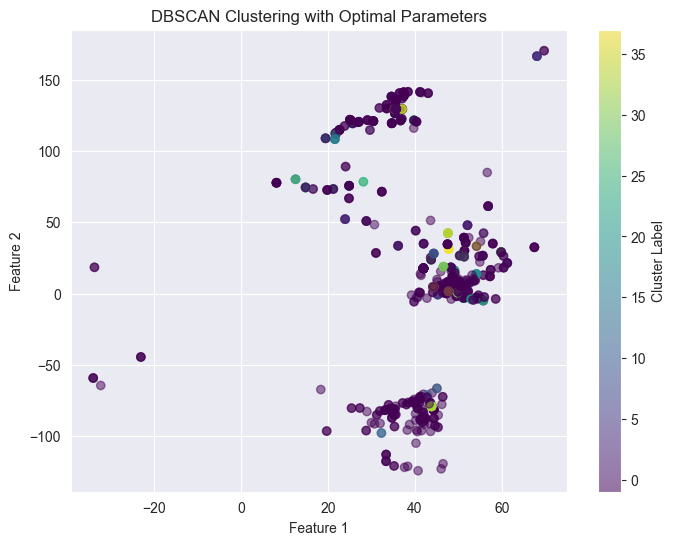

In [57]:
optimal_eps = 1.5
optimal_min_samples = 3

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(X_pca)  


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Optimal Parameters')
plt.colorbar(label='Cluster Label')
plt.show()


Number of clusters: 38
Number of noise points: 586


C:\Users\Oleg_PC\AppData\Local\Temp\ipykernel_16776\4239299956.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0][clusters == label], X[:, 1][clusters == label],


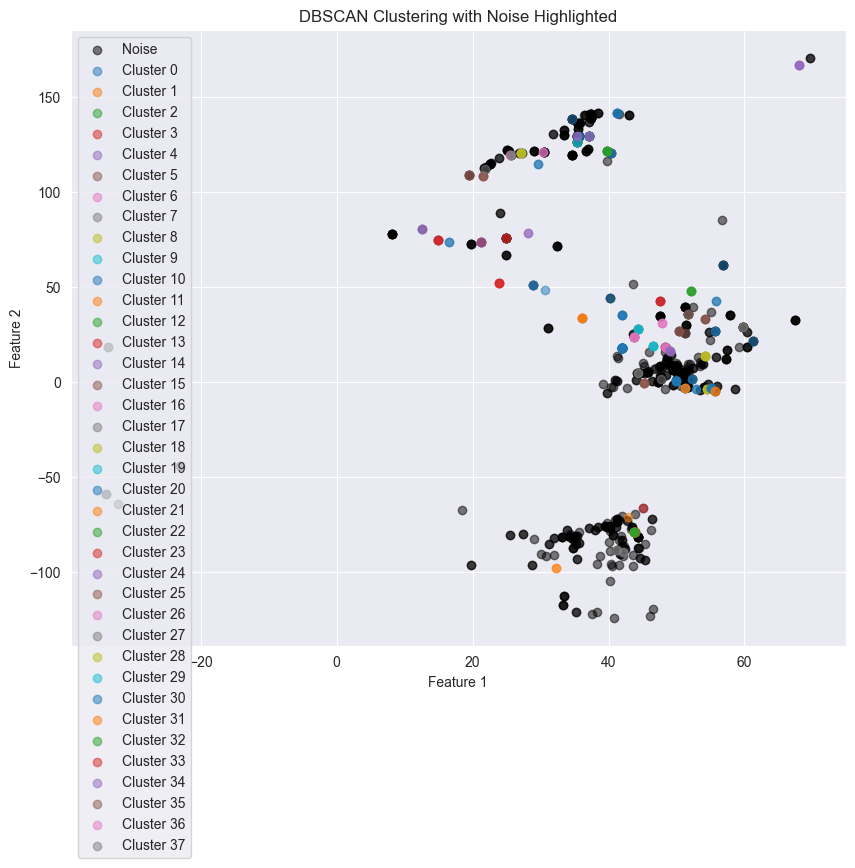

In [58]:
# Розділити кластери та нойзи
clusters = dbscan.labels_
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Визначити кластери та нойзи
unique_labels = np.unique(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)

# Візуалізація результатів
plt.figure(figsize=(10, 8))

# Відобразити кластери
for label in unique_labels:
    if label == -1:
        # Нойзи виводяться окремо як чорний колір
        plt.scatter(X[:, 0][clusters == label], X[:, 1][clusters == label], 
                    color='black', alpha=0.5, label='Noise')
    else:
        plt.scatter(X[:, 0][clusters == label], X[:, 1][clusters == label], 
                    cmap='viridis', alpha=0.5, label=f'Cluster {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Noise Highlighted')
plt.legend()
plt.show()


Optimal eps: 1.5
Optimal min_samples: 10
Best Silhouette Coefficient: -0.2712684664617122


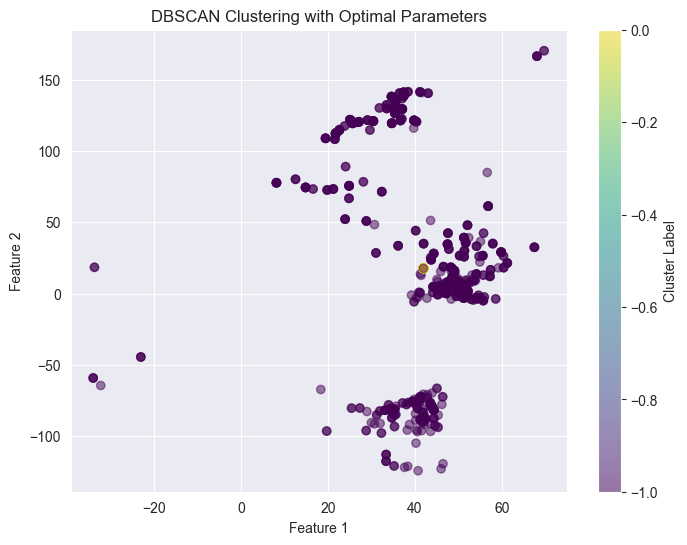

In [64]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Задаємо діапазон значень для eps та min_samples
eps_range = [0.1, 0.5, 1.0, 1.5, 2.0]
min_samples_range = [3, 5, 10, 15, 20]

# Ініціалізуємо змінні для зберігання оптимальних значень та відповідних метрик
optimal_eps = None
optimal_min_samples = None
best_silhouette = -1
best_calinski_harabasz = -1

# Перебираємо всі комбінації eps та min_samples
for eps_val in eps_range:
    for min_samples_val in min_samples_range:
        # Навчання моделі DBSCAN з поточними параметрами
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan.fit_predict(X_prepr)

        # Оцінка результатів кластеризації за допомогою метрик
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_prepr, labels)
            calinski_harabasz = calinski_harabasz_score(X_prepr, labels)

            # Перевіряємо, чи краще поточне значення за метрикою
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                optimal_eps = eps_val
                optimal_min_samples = min_samples_val

# Виводимо оптимальні значення та їх метрики
print("Optimal eps:", optimal_eps)
print("Optimal min_samples:", optimal_min_samples)
print("Best Silhouette Coefficient:", best_silhouette)

# Навчання моделі DBSCAN з оптимальними параметрами
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbs = dbscan_optimal.fit_predict(X_prepr)

# Візуалізація результатів кластеризації з оптимальними параметрами
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_optimal.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Optimal Parameters')
plt.colorbar(label='Cluster Label')
plt.show()


In [68]:
# Оптимальні параметри для кожної моделі
optimal_kmeans = {'silhouette_score': silhouette_score(X_prepr, labels), 'calinski_harabasz_score': calinski_harabasz_score(X_prepr, labels)}
optimal_dbscan = {'silhouette_score': silhouette_score(X_pca, dbs), 'calinski_harabasz_score': calinski_harabasz_score(X_pca, dbs)}

# Створення DataFrame з метриками
data = {'KMeans': optimal_kmeans, 'DBSCAN': optimal_dbscan}
dfres = pd.DataFrame(data)

# Виведення таблиці
print(dfres)

                           KMeans        DBSCAN
silhouette_score        -0.271268 -2.800233e-01
calinski_harabasz_score  0.000633  1.024282e-10
